Stackler verilerin takibini yapmada işe yarayan veri tipleridir. 

Bir stringdeki fazla olan parantez işaretlerini temizleme 

In [67]:
def minRemoveToMakeValid(s: str):
    stack = []

    bad = []

    for index, c in enumerate(s): 
        if c == "(":
            stack.append(index)
        elif c == ")":
            if len(stack) > 0: 
                stack.pop()
            else:
                bad.append(index)
    bad = bad + stack

    return "".join([a for index, a in enumerate(s) if not index in bad])

print(minRemoveToMakeValid("lee(t(c)o)de)"))
print(minRemoveToMakeValid("()))(("))

lee(t(c)o)de
()


Convert infix to postfix

In [14]:
def infixToPostfix(expression):
    precedence = [ "-", "+", "/", "*", "^"]
    
    def calcPrecedence(op):
        return precedence.index(op)
    
    stack = []
    evaluation = []
    for x in expression.split():
        if x in "*-+/^": 
            while stack and stack[-1] != "(" and calcPrecedence(stack[-1]) > calcPrecedence(x):
                evaluation.append(stack.pop())
            stack.append(x)
        elif x == "(":
            stack.append(x)
        elif x == ")":
            while stack and stack[-1] != "(":
                evaluation.append(stack.pop())
            stack.pop()
        else:
            evaluation.append(x)
            
    return evaluation + stack
exp = "a + b * ( c ^ d - e ) ^ ( f + g * h ) - i"
print(infixToPostfix(exp))

['a', 'b', 'c', 'd', '^', 'e', '-', 'f', 'g', 'h', '*', '+', '^', '*', '+', 'i', '-']


Postfix halindeki expressionu hesaplama

In [5]:
import operator
def evalRPN(tokens):
    ops = { "+": operator.add, "-": operator.sub, "/": operator.truediv, "*":operator.mul}

    stack = []         
    for x in tokens: 
        if x.lstrip("-").isdigit():
            stack.append(x)
        else: 
            firstnumber = stack.pop()
            secondnumber = stack.pop()
            add = int(ops[x](int(secondnumber), int(firstnumber)))
            stack.append(add)
        print(tokens)
        print(stack)

    return stack[0]

evalRPN(["10", "6", "9", "3", "+", "-11", "*", "/", "*", "17", "+", "5", "+"])

['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', '9']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', '9', '3']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', 12]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', 12, '-11']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', -132]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', 0]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[0]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[0, '17']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[17]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[17, '5']
['10',

22

In [15]:
exp2 = "( ( 10 * ( 6 / ( ( 9 + 3 ) * -11 ) ) ) + 17 ) + 5"

postfix = infixToPostfix(exp2)
print(postfix)

print(evalRPN(postfix))

['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', '9']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', '9', '3']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', 12]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', 12, '-11']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', '6', -132]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
['10', 0]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[0]
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[0, '17']
['10', '6', '9', '3', '+', '-11', '*', '/', '*', '17', '+', '5', '+']
[17]
['10', '6', '9',

Next greater element

Given an array, print the Next Greater Element (NGE) for every element. The Next greater Element for an element x is the first greater element on the right side of x in the array.


In [13]:
def nextGreaterElement(arr):
    n = len(arr)
    stack = []
    res = [-1]*n
    for i in range(n): 
        while stack and arr[stack[-1]] < arr[i]:
            ind = stack.pop()
            res[ind] = arr[i]
        stack.append(i)
    return res

print(nextGreaterElement([2, 7, 3, 5, 4, 6, 8]))

def previousGreaterElement(arr): 
    n = len(arr)
    stack = []
    res = [-1]*n
    for i in range(n - 1, -1, -1): 
        while stack and arr[stack[-1]] < arr[i]: 
            ind = stack.pop()
            res[ind] = arr[i]
        stack.append(i)
    return res

print(previousGreaterElement([2, 7, 3, 5, 4, 6, 8]))

def nextSmallerElement(arr): 
    n = len(arr)
    stack = []
    res = [-1]*n
    for i in range(n):
        while stack and arr[stack[-1]] >= arr[i]: 
            ind = stack.pop()
            res[ind] = arr[i]
        stack.append(i)
    return res


print(nextSmallerElement([2, 7, 3, 5, 4, 6, 8]))

def previousSmallerElement(arr):
    n = len(arr)
    stack = []
    res = [-1]*n
    for i in range(n - 1, -1, -1): 
        while stack and arr[stack[-1]] >= arr[i]: 
            ind = stack.pop()
            res[ind] = arr[i]
        stack.append(i)
    return res

print(previousSmallerElement([2, 7, 3, 5, 4, 6, 8]))

[7, 8, 5, 6, 6, 8, -1]
[-1, -1, 7, 7, 5, 7, -1]
[-1, 3, -1, 4, -1, -1, -1]
[-1, 2, 2, 3, 3, 4, 6]


Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

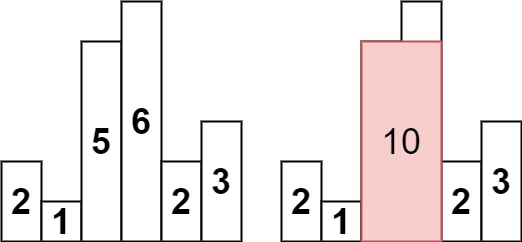

In [12]:
#Stack ile çözüm
def largestRectangleArea(heights):
    stack = []
    ans = 0
    for i in range(len(heights)):
        while stack and heights[i] <= heights[stack[-1]]:
            h = heights[stack.pop()]
            w = i if not stack else i - stack[-1] - 1
            ans = max(ans, w*h)
        stack.append(i)
    return ans
        
    

#Farklı bir çözüm
def largestRectangleArea(heights):
    n = len(heights)
    nextSmallerElement = [n]*n
    previousSmallerElement = [-1]*n
    
    
    stack = []
    for i in range(n): 
        while stack and heights[i] < heights[stack[-1]]:
            nextSmallerElement[stack.pop()] = i
        stack.append(i)
    
    stack = []
    for i in range(n - 1, -1, -1): 
        while stack and heights[i] < heights[stack[-1]]: 
            previousSmallerElement[stack.pop()] = i
        stack.append(i)        
    print(nextSmallerElement, previousSmallerElement)
#     lessFromLeft = [-1] + [0]*(n - 1)
#     lessFromRight = [0]*(n - 1) + [n]

#     for i in range(1, n):
#         j = i - 1
#         while j >= 0 and heights[j] >= heights[i]: 
#             j = lessFromLeft[j]
#         lessFromLeft[i] = j 

#     for i in range(n - 2, -1, -1): 
#         j = i + 1
#         while j < n and heights[j] >= heights[i]: 
#             j = lessFromRight[j]
#         lessFromRight[i] = j
#     print(lessFromRight, lessFromLeft)
    ans = 0
    for x in range(n): 
        ans = max(ans, (nextSmallerElement[x] - previousSmallerElement[x] - 1)*heights[x])
    return ans

print(largestRectangleArea([1,1]))

[2, 2] [-1, -1]
2
